<a href="https://colab.research.google.com/github/rkoprik/txs_graph/blob/main/SoChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transaction data


https://chain.so/

**BITCOIN**

In [28]:
#####################
###### BITCOIN ######
#####################


# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 

# 682950 - 683238: 11/05/2021 
# 683094 - initial example
 
# range block
block_range = list(range(683093, 683200))
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/BTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/BTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)
 
    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_01 = pd.DataFrame({'transaction_id': transaction_id, 'from': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df= df_01[df_01.to != "nulldata"]
df.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df.date = df.date.fillna(method = 'ffill')
df = df.fillna(value=np.nan)

# convert epoch time
for each in range(len(df.date)):
  date_form.append(datetime.datetime.fromtimestamp(df.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df['date_form'] = date_form
df = df.drop(columns = 'date')
df = df.rename(columns = {'date_form': 'date'}, inplace = False)

df.to_csv("BTC_df.csv") 
df 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from,tt_value,to,amount,date
0,5904733a3b5c0762d00fa931358b07af4c7d27272f5307...,coinbase,7.29566629,bc1qx9t2l3pyny2spqpqlye8svce70nppwtaxwdrp4,7.29566629,Tue May 11 11:02:40 2021
1,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,132azVxirjmW5nQqrUHGB1jVzogHv8aWmL,0.00123653,Tue May 11 11:02:40 2021
2,NaN,NaN,NaN,3MR6fT6GT34QPMMszKDi4ALAm8cyqy2xD3,0.00284063,Tue May 11 11:02:40 2021
3,NaN,NaN,NaN,1D2Gb8EATEqS8YcMxTyi5RR5ismqQHzBsK,0.00422860,Tue May 11 11:02:40 2021
4,NaN,NaN,NaN,3AN3E6jF439iBqeyBG7CkVVWZBR88wbdNR,0.02117593,Tue May 11 11:02:40 2021
...,...,...,...,...,...,...
100632,bd6f6dd66747c4ec90b9f030d98040f681473a5ad57a9c...,3ES9ao9qQY6xYBUAsHsioPHK57Y54AjVUU,0.08459010,1DbPZFRXyDqUZCeCsdoe2WWNyX8BFbM1V3,0.14533999,Tue May 11 12:09:14 2021
100633,NaN,3PEFTPabT1qUW8kjp6wM5dmqHJxV6Aspmy,0.03475481,3G8NjoHu5RVrVsvcJMBCgzDGXfuJKGh8jy,0.00833942,Tue May 11 12:09:14 2021
100634,NaN,3G8NjoHu5RVrVsvcJMBCgzDGXfuJKGh8jy,0.03464000,NaN,NaN,Tue May 11 12:09:14 2021
100635,e77a9a3b00f7ad70e05a610e59e29b642a0618057868d9...,bc1qsrx96dxpf9n6fx5fj6c4zrsfc88kr8f7esc009,0.02380999,3KbR9q8tkYfJmY83UoEX1PGvKz5y25uiWF,0.00440000,Tue May 11 12:09:14 2021


NOTE!
We need to be aware of the following different transaction types:
Newly generated coins, identifiable via the participating address "coinbase!

Indicators

In [ ]:
# Indicators

# Edge to vertex ratio
  # number of edges/number of vertices

df_counts = df.count()
#np.sum(df.count())

n_vertices = df['from'].notnull().sum() + df['to'].notnull().sum()
n_vertices

n_edges = len(txs)
n_edges

#edge-to-vertices ratio
edge_vertices_ratio = n_vertices/n_edges
edge_vertices_ratio

#input adress to output adress ration (added - not in Motamed paper)
to_from_ratio = df['to'].notnull().sum()/df['from'].notnull().sum()
to_from_ratio

#clustering coefficient


#density


#size of maximum clique


#assortativity coefficient


#repetition ratio (monthly steps)


#relative growth rate
## DONT THINK WE USE THIS ONE!

1.4717552816170671

,amount,from,to,transaction_id,tt_value,vertices
date,,,,,,
Tue May 11 11:02:40 2021,10591,5772,10591,3306,5772,16363
Tue May 11 11:10:57 2021,7928,5970,7928,2681,5970,13898
Tue May 11 11:14:41 2021,7273,6201,7273,2338,6201,13474
Tue May 11 11:46:04 2021,9718,6199,9718,3024,6199,15917
Tue May 11 11:48:13 2021,3975,6609,3975,1244,6609,10584
Tue May 11 11:51:12 2021,3865,6913,3865,1577,6913,10778
Tue May 11 11:51:52 2021,6238,5784,6238,2282,5784,12022
Tue May 11 11:52:52 2021,7894,5018,7894,2193,5018,12912
Tue May 11 11:53:29 2021,1975,6424,1975,718,6424,8399


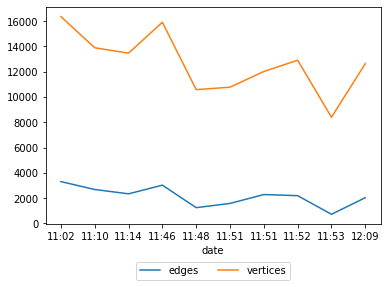

In [51]:
import matplotlib.pyplot as plt

# summarizes df
df_solution = df.pivot_table(index=['date'], aggfunc='count')
# creates new var with vertices
df_solution['vertices'] = df_solution['to'] + df_solution['from']
# consolidated edges and vertices data 
df_egd_vert = pd.DataFrame({'edges': df_solution.transaction_id, 'vertices': df_solution.vertices})
# plot
plot1 = df_egd_vert.plot()
  # rename ticks  
plt.xticks(np.arange(0, 10), ['11:02', '11:10', '11:14', '11:46', '11:48', '11:51', '11:51', '11:52', '11:53', '12:09']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
  # save
plt.savefig('egdes_vertices.png', dpi = 300, transparent=True)
df_solution

Plotting

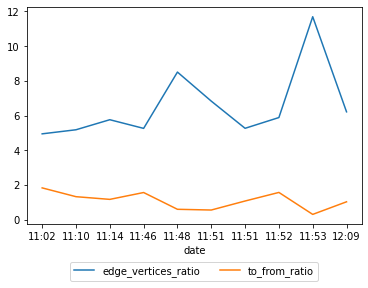

In [52]:
# creates new col with edge to vert ratio
df_solution['edge_vertices_ratio'] = df_solution['vertices'] / df_solution['transaction_id']
# creates new col with to from ratio
df_solution['to_from_ratio'] = df_solution['to'] / df_solution['from']
# creates dataframe
df_ratios = pd.DataFrame({'edge_vertices_ratio': df_solution.edge_vertices_ratio, 'to_from_ratio': df_solution.to_from_ratio})
# plot
df_ratios.plot()
  # rename ticks
plt.xticks(np.arange(0, 10), ['11:02', '11:10', '11:14', '11:46', '11:48', '11:51', '11:51', '11:52', '11:53', '12:09'])
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
  # save
plt.savefig('ratios.png', dpi = 300, transparent=True)

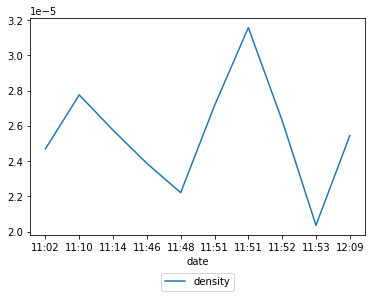

In [57]:
# density
df_solution['density'] = (2*df_solution['transaction_id']) / (df_solution['vertices']*(df_solution['vertices']-1))
# plot
df_solution.density.plot()
  # rename ticks
plt.xticks(np.arange(0, 10), ['11:02', '11:10', '11:14', '11:46', '11:48', '11:51', '11:51', '11:52', '11:53', '12:09'])
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
  # save
plt.savefig('density.png', dpi = 300, transparent=True)

In [56]:
# consolidated data with ratios
df_indicators = pd.DataFrame({'edges': df_solution.transaction_id, 'vertices': df_solution.vertices,
                              'edge_vertices_ratio': df_solution.edge_vertices_ratio, 'to_from_ratio': df_solution.to_from_ratio,
                              'density': df_solution.density})
df_indicators

,edges,vertices,edge_vertices_ratio,to_from_ratio,density
date,,,,,
Tue May 11 11:02:40 2021,3306,16363,4.949486,1.834893,0.000025
Tue May 11 11:10:57 2021,2681,13898,5.183887,1.327973,0.000028
Tue May 11 11:14:41 2021,2338,13474,5.763045,1.172875,0.000026
Tue May 11 11:46:04 2021,3024,15917,5.263558,1.567672,0.000024
Tue May 11 11:48:13 2021,1244,10584,8.508039,0.601453,0.000022
Tue May 11 11:51:12 2021,1577,10778,6.834496,0.559092,0.000027
Tue May 11 11:51:52 2021,2282,12022,5.268186,1.078492,0.000032
Tue May 11 11:52:52 2021,2193,12912,5.887825,1.573137,0.000026
Tue May 11 11:53:29 2021,718,8399,11.697772,0.307441,0.000020


In [ ]:
# nodes = vertices
import networkx as nx
# Not necessary, but will be used later:
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline

In [ ]:
  # Next steps
    # Get number of blocks for first for y - maybe start with a week? maybe a day?
    # Time measures for Monthly TG and Cumulative Monthly TG
    # Network measures - clustering, density, edge-to-vertex ratio, repetition, etc.

# **TESTS**

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------

# time series

# Aggregates data 
# df_solution = df.pivot_table(index=['date'], aggfunc='count')
# df_solution.plot()


# import plotly.express as px
# fig = px.histogram(df, x = 'date', y = 'transaction_id')
# fig.show()

import plotly.express as px
fig = px.line(df_indicators, x = 'date', y = 'edges')
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x = 'date', y = df['from'].notnull().sum() + df['to'].notnull().sum())
fig.show()

Create Network / Transaction graph

In [ ]:
# Network Graph
G = nx.from_pandas_edgelist(df, source='from', target='to')
nx.draw_random(G, node_size = 50)

# ------------------------------------------------------------------------------
# Jaal
  # Jaal(edge_df).plot()

          # https://towardsdatascience.com/introducing-jaal-interacting-with-network-made-easy-124173bb4fa
          # edge_df: it's a pandas dataframe with at least from and to columns, which represents the edge relationship between the entities
          # node_df: it's a pandas dataframe with at least id column which contains the unique node names     

# ------------------------------------------------------------------------------

# NetworkX         
    # https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb
    # https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259



In [ ]:
import pyvis
from pyvis.network import network
net = Network(notebook=True)
net.from_nx(G)
net.show("---")

In [ ]:
Denstity-based graph cluster
LetG= (V,E)be the de-temporal graph ofG;2InitializeGc= (φ,φ)as an empty graph
foreach nodeu∈Vdo
ifisStableCore(u)then
AdduintoGc
foreach unvisited nodev∈N(u)do
  ifS(u,v)has not been computedthen
  ComputeS(u,v)and store it
ifS(u,v)≥τthen
ifisStableCore(v)then
Add nodevand edge(u,v)intoGc
Markuas a visited node
C←the set of connected components inGc
C ←{C∪u∈CN(τ,)(u)|C∈C}; //cluster non-core nodes
returnC
ProcedureComputeS(u,v)
S(u,v)←0
fori←1 :Tdo
HashSet←∅
fornodewin{Ni(u)∪Ni(v)}do
ifHashSet.has(w)thenHashSet.w+ +
elseHashSet.w←0
|Ni(u)|∩|Ni(v)|←#wsatisfyingHashSet.w >0
ifthere is an temporal edge(u,v,t)such thatt∈(ti−1,ti]then
ifσi(u,v)≥thenS(u,v)←S(u,v) + 1
ifS(u,v)≥τthen break
returnS(u,v);

ALTERNATIVE FORMAT FOR NETWORKX

In [59]:
# same import code - different final format

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 682950 - 683238: 11/05/2021 
# 683094 - initial example
 
# range block
block_range = list(range(683093, 683100))
 
r1 = 0
r2 = 4
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/BTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = 10
      # len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/BTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df= df_01[df_01.to != "nulldata"]
df.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df.date = df.date.fillna(method = 'ffill')
df.from_leg = df.from_leg.fillna(method = 'ffill')
df.transaction_id = df.transaction_id.fillna(method = 'ffill')
df.tt_value = df.tt_value.fillna(method = 'ffill')
df = df.fillna(value=np.nan)

# convert epoch time
for each in range(len(df.date)):
  date_form.append(datetime.datetime.fromtimestamp(df.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df['date_form'] = date_form
df = df.drop(columns = 'date')
df = df.rename(columns = {'date_form': 'date'}, inplace = False)


df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from_leg,tt_value,to,amount,date
0,5904733a3b5c0762d00fa931358b07af4c7d27272f5307...,coinbase,7.29566629,bc1qx9t2l3pyny2spqpqlye8svce70nppwtaxwdrp4,7.29566629,Tue May 11 11:02:40 2021
1,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,132azVxirjmW5nQqrUHGB1jVzogHv8aWmL,0.00123653,Tue May 11 11:02:40 2021
2,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,3MR6fT6GT34QPMMszKDi4ALAm8cyqy2xD3,0.00284063,Tue May 11 11:02:40 2021
3,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,1D2Gb8EATEqS8YcMxTyi5RR5ismqQHzBsK,0.00422860,Tue May 11 11:02:40 2021
4,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,3AN3E6jF439iBqeyBG7CkVVWZBR88wbdNR,0.02117593,Tue May 11 11:02:40 2021
...,...,...,...,...,...,...
86,9d34c72f7b4d0f456af03895fc5a0bc943d072e9c7ab85...,1K6htKt2FcviPWGJVAKTPrdacVynWBak2y,1.38197239,1NoRDzt5qmk4pqnfRq7iySsAgMGbUrKv8U,0.00029472,Tue May 11 11:46:04 2021
87,9d34c72f7b4d0f456af03895fc5a0bc943d072e9c7ab85...,1K6htKt2FcviPWGJVAKTPrdacVynWBak2y,1.38197239,1JAHWCTvR6RkekFbqHGomABMcPDXEsYTHf,0.03070796,Tue May 11 11:46:04 2021
88,9d34c72f7b4d0f456af03895fc5a0bc943d072e9c7ab85...,1K6htKt2FcviPWGJVAKTPrdacVynWBak2y,1.38197239,3LeptGksFp1W8RUb8zwxXEFaam4wJcMQqm,0.01000000,Tue May 11 11:46:04 2021
89,9d34c72f7b4d0f456af03895fc5a0bc943d072e9c7ab85...,1K6htKt2FcviPWGJVAKTPrdacVynWBak2y,1.38197239,1JUwvdixdCoqhMsyVbYGYLzGzZP6z7AH4F,1.31212603,Tue May 11 11:46:04 2021


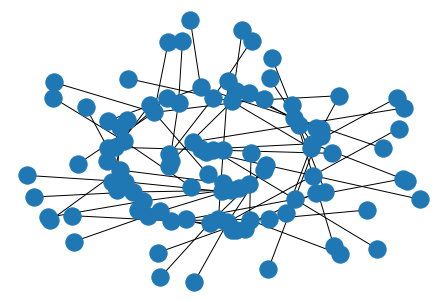

In [61]:
# Prep for NetworkX

# creates tuple list
d = list(df.from_leg)
e = list(df.to)
list_of_edges = []
lst_tuple = list(zip(d,e))

# create an empty graph
g = nx.Graph()

# adds edges
g.add_edges_from(lst_tuple)

# plots
nx.draw_kamada_kawai(g, with_labels=False)    

In [62]:
# Get information on the graph level
  # https://claudius-graebner.com/teaching/20_01-Cusanus19/Networks.html

# Number of vertices
g.number_of_nodes()
nodes_summary = nx.number_of_nodes(g)

# Number of edges
g.number_of_edges()
edges_summary = nx.number_of_edges(g)

# Connectedness
  # A graph is connected if every node can be reached from any other node
connection_summary = nx.is_connected(g)

# Diameter
  # longest distance between two vertices
# nx.diameter(g)
  # NetworkXError: Found infinite path length because the graph is not connected

# Average path length
  # average of all the distances in the graph
# nx.average_shortest_path_length(g)
  # NetworkXError: Graph is not connected.

# Density
density_summary = nx.density(g)

# Transitivity
  # relating the number of triangles with the number of triples in the graph
transitivity_summary = nx.transitivity(g)

# Clustering coefficient
clustering_summary = nx.average_clustering(g)

# Average degree
  # average of all vertex degrees in the graph
avgdegree_summary = np.mean([i[1] for i in g.degree()])

# summary table
summary = pd.DataFrame({'Number of vertices': nodes_summary, 
                        'Number of edges': edges_summary, 
                        'Connectedness': connection_summary, 
                        'Density': density_summary, 
                        'Transitivity': transitivity_summary, 
                        'Clustering': clustering_summary,
                        'Average degree': avgdegree_summary}, index=[0])
summary

,Number of vertices,Number of edges,Connectedness,Density,Transitivity,Clustering,Average degree
0,104,84,False,0.015683,0.031579,0.020192,1.615385


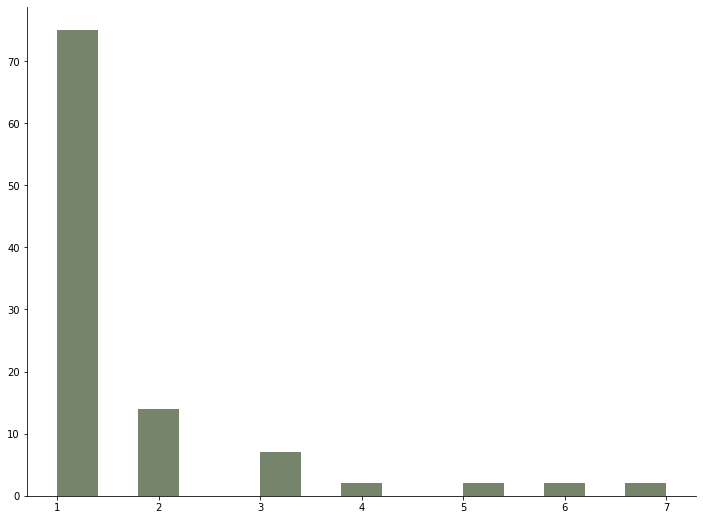

In [73]:
# Degree distribution
  #  degree of a node in a network is the number of connections it has to other 
  # nodes and the degree distribution is the probability distribution of these 
  # degrees over the whole network.
degs = [i[1] for i in g.degree()]
fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(degs, color="#75846b", bins='auto');

plt.savefig('degree_dist.png', dpi = 300, transparent=True)
  # only very few vertices with high degrees, and many with relatively small degrees 
  # -- a typical results for social networks. In such cases, we say that the degree 
  # distribution is heavy tailed.

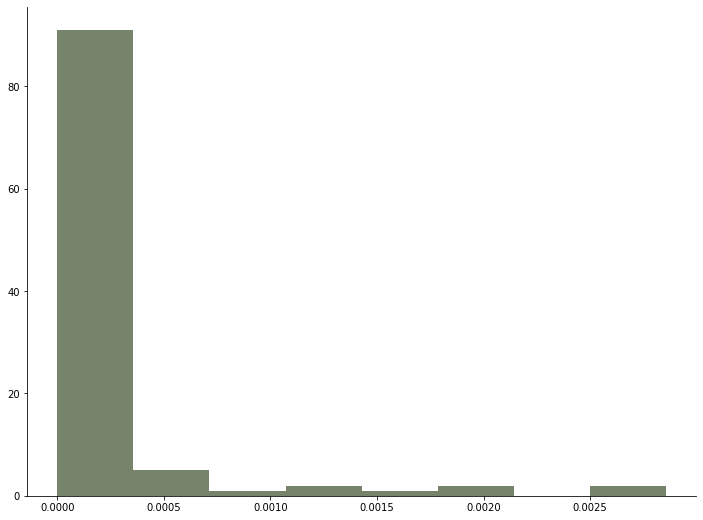

In [75]:
# Betweeness Centrality
  # a vertex is important when it connects two large communities, which would 
  # remain unconnected if the vertex was not there.
  
between_centralities = nx.betweenness_centrality(g).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(between_centralities, color="#75846b", bins='auto');

plt.savefig('betweeness.png', dpi = 300, transparent=True)

In [ ]:
# Get information on the vertex level

# Neighborhood
  # neighborhood of vertex  vi  is the set of all vertices that are adjacent to  vi
nx.all_neighbors(g, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar")

# Connectedness
  # Two vertices are connected of there is a path between then
nx.has_path(g, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar", "coinbase")

# Distance between two vertices
  # In an unweighted graph, the distance between two vertices is the length of 
  # the shortest path between them. In a weighted graph, it is usually the sum of the edge weights between the two vertices.
# nx.shortest_path(g, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar", "1HiPiS3UBYxZPbM8qgr7gmEyVDuuZCzXVA")
  # NetworkXNoPath: No path between bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar and 1HiPiS3UBYxZPbM8qgr7gmEyVDuuZCzXVA.

# Clustering coefficient
  # The clustering coefficient of a single vertex informs us about how well the 
  # neighbors of the vertex are themselves connected. The maximum amount of 
  # clustering is achieved if all neighbors of the vertex are neighbores as well
nx.clustering(g, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar")

# Degree 
  # The degree of  vi  is just the number of adjacent vertices.
g.degree("bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar")

# Eigenvector Centrality
  # The centrality of a vertex measures its structural importance
  # the connection to a vertex that has many degrees counts more than a 
  # connection to a vertex with few connections. This logic leads to the concept 
  # of eigenvector centrality because the recursive calculation of importance can 
  # be expressed as the problem of finding an eigenvector.

# eigen_centralities = nx.eigenvector_centrality(g).values()

# fig, ax = plt.subplots(figsize=(12, 9))
# ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
# ax.spines["right"].set_visible(False) # Remove plot frame line on the right
# ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
# ax.get_yaxis().tick_left()  # Remove the ticks on the left
# ax.set_title("Eigenvector centrality")

# ax.hist(eigen_centralities, color="#3F5D7D", bins='auto');
  # 'power iteration failed to converge within 100 iterations')




# Network graph - prettier
# 

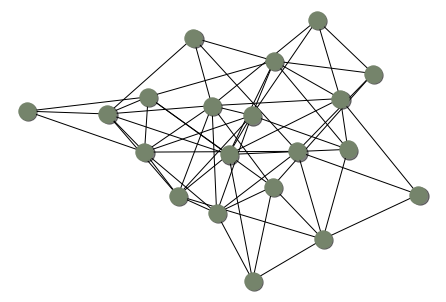

In [76]:
# Network graph 1
import copy
import networkx
import matplotlib.pyplot as plt

# Generate a graph.
# Here I chose an ER graph.
g = nx.erdos_renyi_graph(20, 0.3)

# Get positions.
# Here I use the spectral layout and add a little bit of noise.
pos = nx.layout.spectral_layout(g)
pos = nx.spring_layout(g, pos=pos, iterations=50)

# Create position copies for shadows, and shift shadows
pos_shadow = copy.deepcopy(pos)
shift_amount = 0.006
for idx in pos_shadow:
    pos_shadow[idx][0] += shift_amount
    pos_shadow[idx][1] -= shift_amount

#~~~~~~~~~~~~
# Draw graph
#~~~~~~~~~~~~
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

nx.draw_networkx_nodes(g, pos_shadow, node_color='k', alpha=0.5)
nx.draw_networkx_nodes(g, pos, node_color="#75846b", linewidths=1)
nx.draw_networkx_edges(g, pos, width=1)



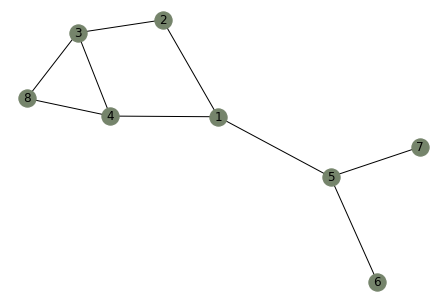

In [77]:
# Network graph 2

import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
  
g = nx.Graph()
  
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(4, 8)
g.add_edge(3, 8)
  
# drawing in spring layout
nx.draw_spring(g, with_labels = True, node_color="#75846b")
plt.savefig("tg.png", transparent = True, dpi = 300)

**BACKUP**

In [ ]:
#####################
###### BITCOIN ######
#####################


# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
 
 
# 682950 - 683238: 11/05/2021 
# 683094 - initial example
 
# range block
block_range = list(range(683093, 683098))
 
r1 = 0
r2 = 1
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
 
# range transaction
r3 = 0
r4 = 10
# len(txs)
size = range(r3, r4)
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/BTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/BTC/' + str(txs[x])
 
    response = requests.get(link_txs)
 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)
 
    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_01 = pd.DataFrame({'transaction_id': transaction_id, 'from': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df= df_01[df_01.to != "nulldata"]
df.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df.date = df.date.fillna(method = 'ffill')
df = df.fillna(value=np.nan)
df

**DOGECOIN**

In [82]:
######################
###### DOGECOIN ######
######################

import requests

# 3802040 - 3802147: 07/07/2021 
# 683094 - initial example
 
# range block
block_range = list(range(3802040, 3802147))
 
r1 = 0
r2 = 50
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://sochain.com/api/v2/get_block/DOGE/' + str(block_range[y])
 
  response = requests.get(link_block)

  if response.status_code == 200:
      # everything went swimmingly
      # parse the response as JSON
      content = response.json()

      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)

  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/DOGE/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
  
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])

          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
  
          # date
          date.append(content['data']['time'])

          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date

    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_dc_01 = pd.DataFrame({'transaction_id': transaction_id, 'from': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_dc= df_dc_01[df_dc_01.to != "nulldata"]
df_dc.reset_index(drop=True, inplace=True)
 
 
# fill NaN with previous data for all NaN, None
df_dc.date = df_dc.date.fillna(method = 'ffill')
df_dc = df_dc.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_dc.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_dc.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_dc['date_form'] = date_form
df_dc = df_dc.drop(columns = 'date')
df_dc = df_dc.rename(columns = {'date_form': 'date'}, inplace = False)

df_dc

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from,tt_value,to,amount,date
0,cd599031e9bb345da38055bfd311643a1c50642de6fec6...,coinbase,10026.15000000,DQvuJB3eHEUmdB2wi2K9B6Vdimq9DNJU7Z,10026.15000000,Wed Jul 7 05:05:25 2021
1,8dcbe3052ce153ec844dfaa7132e023678caa19dee65fb...,DN2GEaPpUyZS6GyuMf6ZkoJ9viAfAgwRwJ,44479.22000000,DTkNwRnWJgyZ3Puq9QwKVQLecrhn8C7CAP,44477.30000000,Wed Jul 7 05:05:25 2021
2,1006e2a267b3f5225c0791722ce7bd47098c9138ef003c...,DFAiZVrFhkFwVd8YiqxoiuQjrSdfM7W1KQ,45.59026418,DERZES1iRBsYUbeyhYXkSSDMFns3inkA9r,1.00200194,Wed Jul 7 05:05:25 2021
3,NaN,DKMxE68RTwVhMsaFnvGfqoh7FoBkZfFqw1,214.75991146,DPUELGczRSs9rrksdjhStjyJ7JpBSj5pL9,6410.00000000,Wed Jul 7 05:05:25 2021
4,NaN,DKMxE68RTwVhMsaFnvGfqoh7FoBkZfFqw1,228.32603189,NaN,NaN,Wed Jul 7 05:05:25 2021
...,...,...,...,...,...,...
1979,NaN,NaN,NaN,D82FLRGitFZ6inBBVdXuWdNSzZDVz7m8Yy,1017.12419449,Wed Jul 7 05:55:49 2021
1980,NaN,NaN,NaN,DTkopCe1ijWA1Kb2ER4KH5riFwzkKZM5dH,1005.02609283,Wed Jul 7 05:55:49 2021
1981,818ae9e1a813abb11be748e59c510d643ce8c4354e9f68...,DTuGdQBcgWNsTJsfPEZdmfRgg2bZL6PcWA,29.00000000,DJ1D7nqHYLEeGb2iAkm5fTSozDbT9BreyK,200.00000000,Wed Jul 7 05:55:49 2021
1982,NaN,DTuGdQBcgWNsTJsfPEZdmfRgg2bZL6PcWA,3.00000000,DTuGdQBcgWNsTJsfPEZdmfRgg2bZL6PcWA,152.10950000,Wed Jul 7 05:55:49 2021


In [ ]:
# Indicators

# Edge to vertex ratio
  # number of edges/number of vertices

df_dc_counts = df_dc.count()
#np.sum(df.count())

n_vertices_dc = df_dc['from'].notnull().sum() + df_dc['to'].notnull().sum()
n_vertices_dc

n_edges_dc = len(txs)
n_edges_dc

#edge-to-vertices ratio
edge_vertices_ratio_dc = n_vertices_dc/n_edges_dc
edge_vertices_ratio_dc

#input adress to output adress ration (added - not in Motamed paper)
to_from_ratio_dc = df_dc['to'].notnull().sum()/df_dc['from'].notnull().sum()
to_from_ratio_dc


,amount,from,to,transaction_id,tt_value,vertices
date,,,,,,
Wed Jul 7 05:05:25 2021,38,66,38,16,66,104
Wed Jul 7 05:05:52 2021,16,12,16,9,12,28
Wed Jul 7 05:06:14 2021,1,1,1,1,1,2
Wed Jul 7 05:06:28 2021,1,1,1,1,1,2
Wed Jul 7 05:07:08 2021,29,23,29,12,23,52
Wed Jul 7 05:07:56 2021,35,21,35,16,21,56
Wed Jul 7 05:08:23 2021,5,3,5,3,3,8
Wed Jul 7 05:08:48 2021,1,1,1,1,1,2
Wed Jul 7 05:10:08 2021,50,40,50,22,40,90


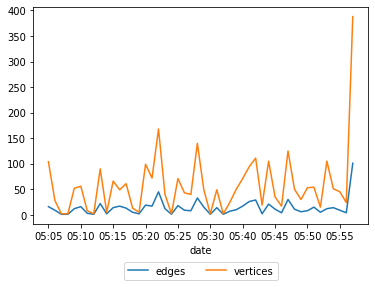

In [87]:
import matplotlib.pyplot as plt

# summarizes df
df_dc_solution = df_dc.pivot_table(index=['date'], aggfunc='count')
# creates new var with vertices
df_dc_solution['vertices'] = df_dc_solution['to'] + df_dc_solution['from']
# consolidated edges and vertices data 
df_dc_egd_vert = pd.DataFrame({'edges': df_dc_solution.transaction_id, 'vertices': df_dc_solution.vertices})
# plot
df_dc_egd_vert.plot()
  # rename ticks  
plt.xticks(np.arange(0, 50, 5), ['05:05', '05:10', '05:15', '05:20', '05:25', '05:30', '05:40', '05:45', '05:50', '05:55']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('egdes_vertices.png', dpi = 300, transparent=True)
df_dc_solution




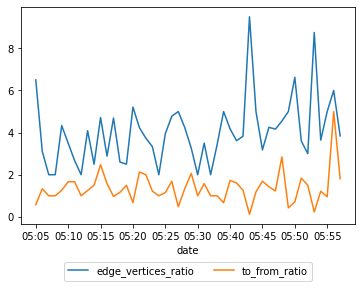

In [89]:
# creates new col with edge to vert ratio
df_dc_solution['edge_vertices_ratio'] = df_dc_solution['vertices'] / df_dc_solution['transaction_id']
# creates new col with to from ratio
df_dc_solution['to_from_ratio'] = df_dc_solution['to'] / df_dc_solution['from']
# creates dataframe
df_dc_ratios = pd.DataFrame({'edge_vertices_ratio': df_dc_solution.edge_vertices_ratio, 'to_from_ratio': df_dc_solution.to_from_ratio})
# plot
df_dc_ratios.plot()
  # rename ticks  
plt.xticks(np.arange(0, 50, 5), ['05:05', '05:10', '05:15', '05:20', '05:25', '05:30', '05:40', '05:45', '05:50', '05:55']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('ratios.png', dpi = 300, transparent=True)

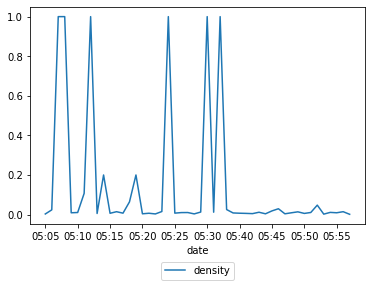

In [90]:
# density
df_dc_solution['density'] = (2*df_dc_solution['transaction_id']) / (df_dc_solution['vertices']*(df_dc_solution['vertices']-1))
# plot
df_dc_solution.density.plot()
  # rename ticks  
plt.xticks(np.arange(0, 50, 5), ['05:05', '05:10', '05:15', '05:20', '05:25', '05:30', '05:40', '05:45', '05:50', '05:55']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('density.png', dpi = 300, transparent=True)

In [91]:
# consolidated data with ratios
df_dc_indicators = pd.DataFrame({'edges': df_dc_solution.transaction_id, 'vertices': df_dc_solution.vertices,
                              'edge_vertices_ratio': df_dc_solution.edge_vertices_ratio, 'to_from_ratio': df_dc_solution.to_from_ratio,
                              'density': df_dc_solution.density})
df_dc_indicators

,edges,vertices,edge_vertices_ratio,to_from_ratio,density
date,,,,,
Wed Jul 7 05:05:25 2021,16,104,6.500000,0.575758,0.002987
Wed Jul 7 05:05:52 2021,9,28,3.111111,1.333333,0.023810
Wed Jul 7 05:06:14 2021,1,2,2.000000,1.000000,1.000000
Wed Jul 7 05:06:28 2021,1,2,2.000000,1.000000,1.000000
Wed Jul 7 05:07:08 2021,12,52,4.333333,1.260870,0.009050
Wed Jul 7 05:07:56 2021,16,56,3.500000,1.666667,0.010390
Wed Jul 7 05:08:23 2021,3,8,2.666667,1.666667,0.107143
Wed Jul 7 05:08:48 2021,1,2,2.000000,1.000000,1.000000
Wed Jul 7 05:10:08 2021,22,90,4.090909,1.250000,0.005493


In [ ]:
# nodes = vertices
import networkx as nx
# Not necessary, but will be used later:
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline

In [ ]:
# Network Graph
G = nx.from_pandas_edgelist(df_dc, source='from', target='to')
nx.draw_random(G, node_size = 50)

# ------------------------------------------------------------------------------
# Jaal
  # Jaal(edge_df).plot()

          # https://towardsdatascience.com/introducing-jaal-interacting-with-network-made-easy-124173bb4fa
          # edge_df: it's a pandas dataframe with at least from and to columns, which represents the edge relationship between the entities
          # node_df: it's a pandas dataframe with at least id column which contains the unique node names     

# ------------------------------------------------------------------------------

# NetworkX         
    # https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb
    # https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259



In [ ]:
import pyvis
from pyvis.network import network
net = Network(notebook=True)
net.from_nx(G)
net.show("---")

In [93]:
# same import code - different final format - DOGECOIN

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 3802140 - 3802147: 07/07/2021 
# 683094 - initial example
 
# range block
block_range = list(range(3802140, 3803147))
 
r1 = 0
r2 = 50
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/DOGE/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/DOGE/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_dc_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_dc= df_dc_01[df_dc_01.to != "nulldata"]
df_dc.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df_dc.date = df_dc.date.fillna(method = 'ffill')
df_dc.from_leg = df_dc.from_leg.fillna(method = 'ffill')
df_dc.transaction_id = df_dc.transaction_id.fillna(method = 'ffill')
df_dc.tt_value = df_dc.tt_value.fillna(method = 'ffill')
df_dc = df_dc.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_dc.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_dc.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_dc['date_form'] = date_form
df_dc = df_dc.drop(columns = 'date')
df_dc = df_dc.rename(columns = {'date_form': 'date'}, inplace = False)


df_dc

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from_leg,tt_value,to,amount,date
0,8ac00ecb8eb4093eca89ed5d5ff7d5278b7fc948b17e5f...,coinbase,10020.09818466,DL7PtcKycScxfBn34WgiRELGvR5FSuMD4t,10020.09818466,Wed Jul 7 06:47:56 2021
1,63762b983bca3c0d70fa6d1b6ad7047dbaffc3009fc74b...,DLCDJhnh6aGotar6b182jpzbNEyXb3C361,19131.74161126,DLXAXirdAtb7NNAu7xC9NhbzqhEbYkKp6t,1040.19141300,Wed Jul 7 06:47:56 2021
2,63762b983bca3c0d70fa6d1b6ad7047dbaffc3009fc74b...,DLCDJhnh6aGotar6b182jpzbNEyXb3C361,19131.74161126,DLCDJhnh6aGotar6b182jpzbNEyXb3C361,18089.55019826,Wed Jul 7 06:47:56 2021
3,aab2df8e355ead48da571e22f6943a88bdd124f8403160...,DGkTm3kPnVGBbwbg5jCffyqrFDqZnGiz7f,12318.84684978,D6viz2kusDhFe4Zqxotr19iGpEohJyf6A4,1300.00000000,Wed Jul 7 06:47:56 2021
4,aab2df8e355ead48da571e22f6943a88bdd124f8403160...,DGkTm3kPnVGBbwbg5jCffyqrFDqZnGiz7f,12318.84684978,DGkTm3kPnVGBbwbg5jCffyqrFDqZnGiz7f,11016.58684978,Wed Jul 7 06:47:56 2021
...,...,...,...,...,...,...
2831,4932ac097a2ab87e6f060cb054261c6133291556d8896a...,DDUoTGov76gcqAEBXXpUHzSuSQkPYKze9N,8.85096282,DDUoTGov76gcqAEBXXpUHzSuSQkPYKze9N,12.18099682,Wed Jul 7 07:46:21 2021
2832,ba064909d8cef033d4c4ff6961f32c4fe53eb2457ab525...,9yA7hBT6m8mRSdRt6VvQdXbtbq5QrMfUui,8030.92322450,D9hT1jSwCGnAhxPvUCF8ULSuDUkSxASeSC,57.00000000,Wed Jul 7 07:46:21 2021
2833,ba064909d8cef033d4c4ff6961f32c4fe53eb2457ab525...,9yA7hBT6m8mRSdRt6VvQdXbtbq5QrMfUui,8030.92322450,9yA7hBT6m8mRSdRt6VvQdXbtbq5QrMfUui,7972.92322450,Wed Jul 7 07:46:21 2021
2834,22bc80f6abcc33cf5541c088775d565fade5e9788768fe...,DLDLuUcmaBT5C4nFjF62kxB6BQwtnzSANs,99.00000000,DNxxdFwkscLDtVoJ8HgYMjXHReTHg7pxMt,150.00000000,Wed Jul 7 07:46:21 2021


In [98]:
# Prep for NetworkX

# creates tuple list
d = list(df_dc.from_leg)
e = list(df_dc.to)
list_of_edges = []
# tuple
lst_tuple = list(zip(d,e))

# create an empty graph
g = nx.Graph()

# adds edges
g.add_edges_from(lst_tuple)

# plots
# nx.draw_kamada_kawai(g, with_labels=False)    

In [99]:
# Get information on the graph level
  # https://claudius-graebner.com/teaching/20_01-Cusanus19/Networks.html

# Number of vertices
g.number_of_nodes()
nodes_summary = nx.number_of_nodes(g)

# Number of edges
g.number_of_edges()
edges_summary = nx.number_of_edges(g)

# Connectedness
  # A graph is connected if every node can be reached from any other node
connection_summary = nx.is_connected(g)

# Diameter
  # longest distance between two vertices
# nx.diameter(g)
  # NetworkXError: Found infinite path length because the graph is not connected

# Average path length
  # average of all the distances in the graph
# nx.average_shortest_path_length(g)
  # NetworkXError: Graph is not connected.

# Density
density_summary = nx.density(g)

# Transitivity
  # relating the number of triangles with the number of triples in the graph
transitivity_summary = nx.transitivity(g)

# Clustering coefficient
clustering_summary = nx.average_clustering(g)

# Average degree
  # average of all vertex degrees in the graph
avgdegree_summary = np.mean([i[1] for i in g.degree()])

# summary table
summary = pd.DataFrame({'Number of vertices': nodes_summary, 
                        'Number of edges': edges_summary, 
                        'Connectedness': connection_summary, 
                        'Density': density_summary, 
                        'Transitivity': transitivity_summary, 
                        'Clustering': clustering_summary,
                        'Average degree': avgdegree_summary}, index=[0])
summary

,Number of vertices,Number of edges,Connectedness,Density,Transitivity,Clustering,Average degree
0,2502,2390,False,0.000764,0.000203,0.009231,1.910472


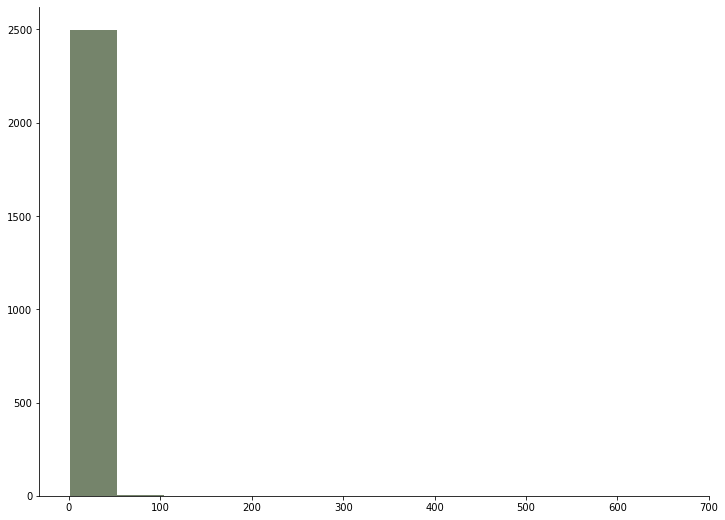

In [100]:
# Degree distribution
  #  degree of a node in a network is the number of connections it has to other 
  # nodes and the degree distribution is the probability distribution of these 
  # degrees over the whole network.
degs = [i[1] for i in g.degree()]
fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(degs, color="#75846b", bins='auto');

plt.savefig('degree_dist.png', dpi = 300, transparent=True)
  # only very few vertices with high degrees, and many with relatively small degrees 
  # -- a typical results for social networks. In such cases, we say that the degree 
  # distribution is heavy tailed.

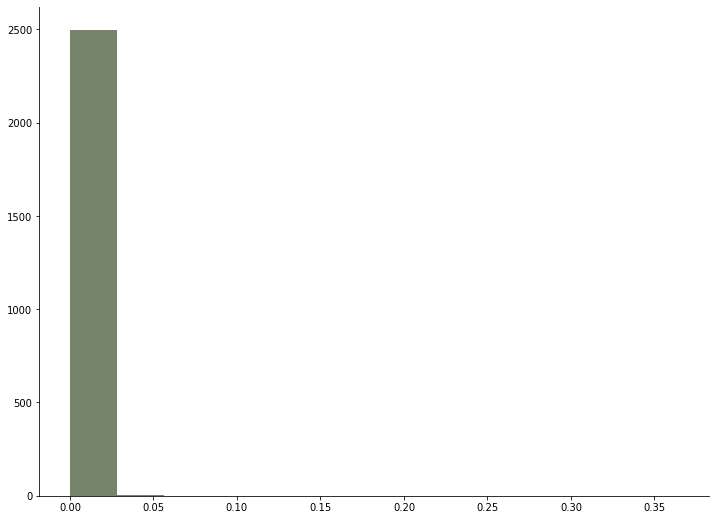

In [101]:
# Betweeness Centrality
  # a vertex is important when it connects two large communities, which would 
  # remain unconnected if the vertex was not there.
  
between_centralities = nx.betweenness_centrality(g).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(between_centralities, color="#75846b", bins='auto');

plt.savefig('betweeness.png', dpi = 300, transparent=True)

In [ ]:
# Get information on the vertex level

# Neighborhood
  # neighborhood of vertex  vi  is the set of all vertices that are adjacent to  vi
nx.all_neighbors(g, "DLCDJhnh6aGotar6b182jpzbNEyXb3C361")

# Connectedness
  # Two vertices are connected of there is a path between then
nx.has_path(g, "DLCDJhnh6aGotar6b182jpzbNEyXb3C361", "coinbase")

# Distance between two vertices
  # In an unweighted graph, the distance between two vertices is the length of 
  # the shortest path between them. In a weighted graph, it is usually the sum of the edge weights between the two vertices.
# nx.shortest_path(g, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar", "1HiPiS3UBYxZPbM8qgr7gmEyVDuuZCzXVA")
  # NetworkXNoPath: No path between bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar and 1HiPiS3UBYxZPbM8qgr7gmEyVDuuZCzXVA.

# Clustering coefficient
  # The clustering coefficient of a single vertex informs us about how well the 
  # neighbors of the vertex are themselves connected. The maximum amount of 
  # clustering is achieved if all neighbors of the vertex are neighbores as well
nx.clustering(g, "DLCDJhnh6aGotar6b182jpzbNEyXb3C361")

# Degree 
  # The degree of  vi  is just the number of adjacent vertices.
g.degree("DLCDJhnh6aGotar6b182jpzbNEyXb3C361")

# Eigenvector Centrality
  # The centrality of a vertex measures its structural importance
  # the connection to a vertex that has many degrees counts more than a 
  # connection to a vertex with few connections. This logic leads to the concept 
  # of eigenvector centrality because the recursive calculation of importance can 
  # be expressed as the problem of finding an eigenvector.

# eigen_centralities = nx.eigenvector_centrality(g).values()

# fig, ax = plt.subplots(figsize=(12, 9))
# ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
# ax.spines["right"].set_visible(False) # Remove plot frame line on the right
# ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
# ax.get_yaxis().tick_left()  # Remove the ticks on the left
# ax.set_title("Eigenvector centrality")

# ax.hist(eigen_centralities, color="#3F5D7D", bins='auto');
  # 'power iteration failed to converge within 100 iterations')




**DOGECOIN - NETWORK GRAPH - PRETTIER**

In [ ]:
# Network graph 1
import copy
import networkx
import matplotlib.pyplot as plt

# Generate a graph.
# Here I chose an ER graph.
g = nx.erdos_renyi_graph(20, 0.3)

# Get positions.
# Here I use the spectral layout and add a little bit of noise.
pos = nx.layout.spectral_layout(g)
pos = nx.spring_layout(g, pos=pos, iterations=50)

# Create position copies for shadows, and shift shadows
pos_shadow = copy.deepcopy(pos)
shift_amount = 0.006
for idx in pos_shadow:
    pos_shadow[idx][0] += shift_amount
    pos_shadow[idx][1] -= shift_amount

#~~~~~~~~~~~~
# Draw graph
#~~~~~~~~~~~~
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

nx.draw_networkx_nodes(g, pos_shadow, node_color='k', alpha=0.5)
nx.draw_networkx_nodes(g, pos, node_color="#75846b", linewidths=1)
nx.draw_networkx_edges(g, pos, width=1)



In [ ]:
# Network graph 2

import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
  
g = nx.Graph()
  
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(4, 8)
g.add_edge(3, 8)
  
# drawing in spring layout
nx.draw_spring(g, with_labels = True, node_color="#75846b")
plt.savefig("tg.png", transparent = True, dpi = 300)




**LITECOIN**

In [105]:
######################
###### LITECOIN ######
######################

import requests

# 2082158 - 2082265: 07/07/2021 
# 683094 - initial example
 
# range block
block_range = list(range(2082158, 2083265))
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://sochain.com/api/v2/get_block/LTC/' + str(block_range[y])
 
  response = requests.get(link_block)

  if response.status_code == 200:
      # everything went swimmingly
      # parse the response as JSON
      content = response.json()

      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)

  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/LTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
  
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])

          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
  
          # date
          date.append(content['data']['time'])

          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date

    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_lc_01 = pd.DataFrame({'transaction_id': transaction_id, 'from': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_lc= df_lc_01[df_lc_01.to != "nulldata"]
df_lc.reset_index(drop=True, inplace=True)
 
 
# fill NaN with previous data for all NaN, None
df_lc.date = df_lc.date.fillna(method = 'ffill')
df_lc = df_lc.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_lc.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_lc.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_lc['date_form'] = date_form
df_lc = df_lc.drop(columns = 'date')
df_lc = df_lc.rename(columns = {'date_form': 'date'}, inplace = False)

df_lc

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from,tt_value,to,amount,date
0,87a7c75ae71db769e50fb2d5af3e8a26a66c425c1bd23b...,coinbase,12.51116101,LMs7eqZhREmAP4xpmXi6QQxVaqTYqPFTFK,12.51116101,Wed Jul 7 04:52:02 2021
1,2223cc5df2a2f36e1c749912b75fa2e316999172d32f94...,LXwLaRwEwRkzTCNQRGzdG1JxqYUunz7Wmd,3652.48992321,LSuYaceoEfq2ooaZGpyJAAJtBmEbSTg7sY,3651.69584752,Wed Jul 7 04:52:02 2021
2,NaN,NaN,NaN,LRyvu3nijcbvn8WmLTf3DmpiWmUGfYewLc,0.79332570,Wed Jul 7 04:52:02 2021
3,513b6721b5d7d2da63410fbd5de5d8aa8df4af4b79f60a...,3EzfwudbQZMtZp5ce7DhJgNVCBqSghpBSw,0.00439944,LWY1YsNTUHb7JkXDotg3ZxgYZ8cEcPcGKy,0.00602100,Wed Jul 7 04:52:02 2021
4,NaN,3FskDumYRGiJPS4BwsfRDq1mwKNd74BJqM,0.00118125,NaN,NaN,Wed Jul 7 04:52:02 2021
...,...,...,...,...,...,...
8743,cbfc7efce8f601ded09569df0c150017cc84e8bc541e48...,3HoAmSCK8J5NPjwv2FCZmyv9BLUKFA1A4h,0.31901518,32mbESSUVuw8eBCg8D6BHTgMxgT66L9hvP,0.12903317,Wed Jul 7 05:16:08 2021
8744,NaN,NaN,NaN,3DvyWptajAp4yioyhRFhkz6Fdpdbrthe9y,0.18998030,Wed Jul 7 05:16:08 2021
8745,498cc25b90b0f04d9e7b83bd24da795656d6ad660fe415...,ltc1qxfxqj096kzkcwsj03f7et3l7h48ex30sckpkyy,0.00238409,ltc1q2espetuh3mm5qvrm6spcz7ep50yatj97hhs90w,0.00399596,Wed Jul 7 05:16:08 2021
8746,NaN,ltc1qd396yhfw04909yjnx2za9gpey8q6ll5tcal6a2,0.10000000,3CpU7hSZH51prATQDCFYJPrJcnXm6fcKSV,0.09838602,Wed Jul 7 05:16:08 2021


In [ ]:
# Indicators

# Edge to vertex ratio
  # number of edges/number of vertices

df_lc_counts = df_lc.count()
#np.sum(df.count())

n_vertices_lc = df_lc['from'].notnull().sum() + df_lc['to'].notnull().sum()
n_vertices_lc

n_edges_lc = len(txs)
n_edges_lc

#edge-to-vertices ratio
edge_vertices_ratio_lc = n_vertices_lc/n_edges_lc
edge_vertices_ratio_lc

#input adress to output adress ration (added - not in Motamed paper)
to_from_ratio_lc = df_lc['to'].notnull().sum()/df_lc['from'].notnull().sum()
to_from_ratio_lc


,amount,from,to,transaction_id,tt_value,vertices
date,,,,,,
Wed Jul 7 04:52:02 2021,392,203,392,99,203,595
Wed Jul 7 04:54:10 2021,485,122,485,84,122,607
Wed Jul 7 04:55:15 2021,233,85,233,48,85,318
Wed Jul 7 04:58:26 2021,1734,521,1734,257,521,2255
Wed Jul 7 05:08:24 2021,2338,1075,2338,358,1075,3413
Wed Jul 7 05:10:05 2021,492,229,492,79,229,721
Wed Jul 7 05:11:01 2021,135,177,135,30,177,312
Wed Jul 7 05:14:11 2021,755,276,755,129,276,1031
Wed Jul 7 05:16:08 2021,499,423,499,93,423,922


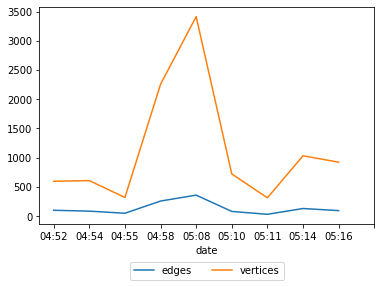

In [107]:
import matplotlib.pyplot as plt

# summarizes df
df_lc_solution = df_lc.pivot_table(index=['date'], aggfunc='count')
# creates new var with vertices
df_lc_solution['vertices'] = df_lc_solution['to'] + df_lc_solution['from']
# consolidated edges and vertices data 
df_lc_egd_vert = pd.DataFrame({'edges': df_lc_solution.transaction_id, 'vertices': df_lc_solution.vertices})
# plot
df_lc_egd_vert.plot()
  # rename ticks  
plt.xticks(np.arange(0, 10, 1), ['04:52', '04:54', '04:55', '04:58', '05:08', '05:10', '05:11', '05:14', '05:16']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('egdes_vertices.png', dpi = 300, transparent=True)
df_lc_solution

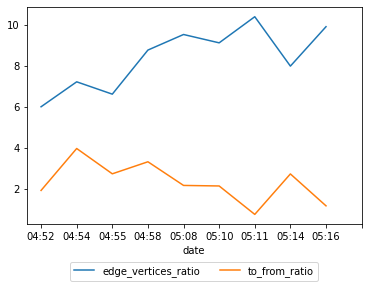

In [108]:
# creates new col with edge to vert ratio
df_lc_solution['edge_vertices_ratio'] = df_lc_solution['vertices'] / df_lc_solution['transaction_id']
# creates new col with to from ratio
df_lc_solution['to_from_ratio'] = df_lc_solution['to'] / df_lc_solution['from']
# creates dataframe
df_lc_ratios = pd.DataFrame({'edge_vertices_ratio': df_lc_solution.edge_vertices_ratio, 'to_from_ratio': df_lc_solution.to_from_ratio})
# plot
df_lc_ratios.plot()
  # rename ticks  
plt.xticks(np.arange(0, 10, 1), ['04:52', '04:54', '04:55', '04:58', '05:08', '05:10', '05:11', '05:14', '05:16']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('ratios.png', dpi = 300, transparent=True)

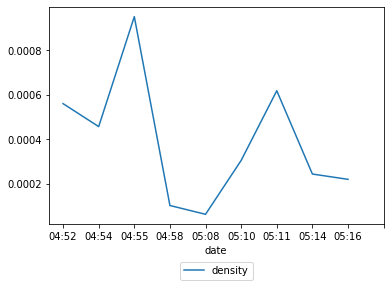

In [109]:
# density
df_lc_solution['density'] = (2*df_lc_solution['transaction_id']) / (df_lc_solution['vertices']*(df_lc_solution['vertices']-1))
# plot
df_lc_solution.density.plot()
  # rename ticks  
plt.xticks(np.arange(0, 10, 1), ['04:52', '04:54', '04:55', '04:58', '05:08', '05:10', '05:11', '05:14', '05:16']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('density.png', dpi = 300, transparent=True)

In [110]:
# consolidated data with ratios
df_lc_indicators = pd.DataFrame({'edges': df_lc_solution.transaction_id, 'vertices': df_lc_solution.vertices,
                              'edge_vertices_ratio': df_lc_solution.edge_vertices_ratio, 'to_from_ratio': df_lc_solution.to_from_ratio,
                              'density': df_lc_solution.density})
df_lc_indicators

,edges,vertices,edge_vertices_ratio,to_from_ratio,density
date,,,,,
Wed Jul 7 04:52:02 2021,99,595,6.010101,1.931034,0.000560
Wed Jul 7 04:54:10 2021,84,607,7.226190,3.975410,0.000457
Wed Jul 7 04:55:15 2021,48,318,6.625000,2.741176,0.000952
Wed Jul 7 04:58:26 2021,257,2255,8.774319,3.328215,0.000101
Wed Jul 7 05:08:24 2021,358,3413,9.533520,2.174884,0.000061
Wed Jul 7 05:10:05 2021,79,721,9.126582,2.148472,0.000304
Wed Jul 7 05:11:01 2021,30,312,10.400000,0.762712,0.000618
Wed Jul 7 05:14:11 2021,129,1031,7.992248,2.735507,0.000243
Wed Jul 7 05:16:08 2021,93,922,9.913978,1.179669,0.000219


In [ ]:
# NOT USED

# nodes = vertices
import networkx as nx
# Not necessary, but will be used later:
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline

In [ ]:
# NOT USED

import plotly.express as px
fig = px.histogram(df_lc, x = 'date', y = df_lc['from'].notnull().sum() + df_lc['to'].notnull().sum())
fig.show()

In [ ]:
# NOT USED

# Network Graph
G = nx.from_pandas_edgelist(df_lc, source='from', target='to')
nx.draw_random(G, node_size = 50)

# ------------------------------------------------------------------------------
# Jaal
  # Jaal(edge_df).plot()

          # https://towardsdatascience.com/introducing-jaal-interacting-with-network-made-easy-124173bb4fa
          # edge_df: it's a pandas dataframe with at least from and to columns, which represents the edge relationship between the entities
          # node_df: it's a pandas dataframe with at least id column which contains the unique node names     

# ------------------------------------------------------------------------------

# NetworkX         
    # https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb
    # https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259



In [ ]:
# NOT USED

import pyvis
from pyvis.network import network
net = Network(notebook=True)
net.from_nx(G)
net.show("---")

In [112]:
# same import code - different final format

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 2082258 - 2082265: 07/07/2021 
# 683094 - initial example
 
# range block
block_range = list(range(2082258, 2082365))
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/LTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/LTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_dc_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_lc = df_dc_01[df_lc_01.to != "nulldata"]
df_lc.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df_lc.date = df_lc.date.fillna(method = 'ffill')
df_lc.from_leg = df_lc.from_leg.fillna(method = 'ffill')
df_lc.transaction_id = df_lc.transaction_id.fillna(method = 'ffill')
df_lc.tt_value = df_lc.tt_value.fillna(method = 'ffill')
df_lc = df_lc.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_lc.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_lc.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_lc['date_form'] = date_form
df_lc = df_lc.drop(columns = 'date')
df_lc = df_lc.rename(columns = {'date_form': 'date'}, inplace = False)


df_lc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


IndexingError: ignored

In [97]:
# Prep for NetworkX

# creates tuple list
d = list(df_lc.from_leg)
e = list(df_lc.to)
list_of_edges = []
# tuple
lst_tuple = list(zip(d,e))

# create an empty graph
g = nx.Graph()

# adds edges
g.add_edges_from(lst_tuple)

# plots
# nx.draw_kamada_kawai(g, with_labels=False)    

NameError: ignored

In [ ]:
# Get information on the graph level
  # https://claudius-graebner.com/teaching/20_01-Cusanus19/Networks.html

# Number of vertices
g.number_of_nodes()
nodes_summary = nx.number_of_nodes(g)

# Number of edges
g.number_of_edges()
edges_summary = nx.number_of_edges(g)

# Connectedness
  # A graph is connected if every node can be reached from any other node
connection_summary = nx.is_connected(g)

# Diameter
  # longest distance between two vertices
# nx.diameter(g)
  # NetworkXError: Found infinite path length because the graph is not connected

# Average path length
  # average of all the distances in the graph
# nx.average_shortest_path_length(g)
  # NetworkXError: Graph is not connected.

# Density
density_summary = nx.density(g)

# Transitivity
  # relating the number of triangles with the number of triples in the graph
transitivity_summary = nx.transitivity(g)

# Clustering coefficient
clustering_summary = nx.average_clustering(g)

# Average degree
  # average of all vertex degrees in the graph
avgdegree_summary = np.mean([i[1] for i in g.degree()])

# summary table
summary = pd.DataFrame({'Number of vertices': nodes_summary, 
                        'Number of edges': edges_summary, 
                        'Connectedness': connection_summary, 
                        'Density': density_summary, 
                        'Transitivity': transitivity_summary, 
                        'Clustering': clustering_summary,
                        'Average degree': avgdegree_summary}, index=[0])
summary

In [ ]:
# Degree distribution
  #  degree of a node in a network is the number of connections it has to other 
  # nodes and the degree distribution is the probability distribution of these 
  # degrees over the whole network.
degs = [i[1] for i in g.degree()]
fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.set_title("Degree distribution") # title

ax.hist(degs, color="#3F5D7D", bins='auto');

plt.savefig('degree_dist.png', dpi = 300, transparent=True)
  # only very few vertices with high degrees, and many with relatively small degrees 
  # -- a typical results for social networks. In such cases, we say that the degree 
  # distribution is heavy tailed.

In [ ]:
# Betweeness Centrality
  # a vertex is important when it connects two large communities, which would 
  # remain unconnected if the vertex was not there.
  
between_centralities = nx.betweenness_centrality(g).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.set_title("Betweeness centrality")

ax.hist(between_centralities, color="#3F5D7D", bins='auto');

plt.savefig('betweeness.png', dpi = 300, transparent=True)

In [ ]:
# Get information on the vertex level

# Neighborhood
  # neighborhood of vertex  vi  is the set of all vertices that are adjacent to  vi
nx.all_neighbors(g, "LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp")

# Connectedness
  # Two vertices are connected of there is a path between then
nx.has_path(g, "LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp", "coinbase")

# Distance between two vertices
  # In an unweighted graph, the distance between two vertices is the length of 
  # the shortest path between them. In a weighted graph, it is usually the sum of the edge weights between the two vertices.
# nx.shortest_path(g, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar", "1HiPiS3UBYxZPbM8qgr7gmEyVDuuZCzXVA")
  # NetworkXNoPath: No path between bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar and 1HiPiS3UBYxZPbM8qgr7gmEyVDuuZCzXVA.

# Clustering coefficient
  # The clustering coefficient of a single vertex informs us about how well the 
  # neighbors of the vertex are themselves connected. The maximum amount of 
  # clustering is achieved if all neighbors of the vertex are neighbores as well
nx.clustering(g, "LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp")

# Degree 
  # The degree of  vi  is just the number of adjacent vertices.
g.degree("LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp")

# Eigenvector Centrality
  # The centrality of a vertex measures its structural importance
  # the connection to a vertex that has many degrees counts more than a 
  # connection to a vertex with few connections. This logic leads to the concept 
  # of eigenvector centrality because the recursive calculation of importance can 
  # be expressed as the problem of finding an eigenvector.

# eigen_centralities = nx.eigenvector_centrality(g).values()

# fig, ax = plt.subplots(figsize=(12, 9))
# ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
# ax.spines["right"].set_visible(False) # Remove plot frame line on the right
# ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
# ax.get_yaxis().tick_left()  # Remove the ticks on the left
# ax.set_title("Eigenvector centrality")

# ax.hist(eigen_centralities, color="#3F5D7D", bins='auto');
  # 'power iteration failed to converge within 100 iterations')




**DOGECOIN - NETWORK GRAPH - PRETTIER**

In [ ]:
# Network graph 1
import copy
import networkx
import matplotlib.pyplot as plt

# Generate a graph.
# Here I chose an ER graph.
g = nx.erdos_renyi_graph(20, 0.3)

# Get positions.
# Here I use the spectral layout and add a little bit of noise.
pos = nx.layout.spectral_layout(g)
pos = nx.spring_layout(g, pos=pos, iterations=50)

# Create position copies for shadows, and shift shadows
pos_shadow = copy.deepcopy(pos)
shift_amount = 0.006
for idx in pos_shadow:
    pos_shadow[idx][0] += shift_amount
    pos_shadow[idx][1] -= shift_amount

#~~~~~~~~~~~~
# Draw graph
#~~~~~~~~~~~~
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

nx.draw_networkx_nodes(g, pos_shadow, node_color='k', alpha=0.5)
nx.draw_networkx_nodes(g, pos, node_color="#75846b", linewidths=1)
nx.draw_networkx_edges(g, pos, width=1)



In [ ]:
# Network graph 2

import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
  
g = nx.Graph()
  
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(4, 8)
g.add_edge(3, 8)
  
# drawing in spring layout
nx.draw_spring(g, with_labels = True, node_color="#75846b")
plt.savefig("tg.png", transparent = True, dpi = 300)

In [ ]:
# COMMUNITY DETECTION


G = nx.path_graph(10)
comp = girvan_newman(G)
tuple(sorted(c) for c in next(comp))

In [ ]:
# same import code - different final format

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 682950 - 683238: 11/05/2021 
# 683094 - initial example
 
# range block
block_range = list(range(683093, 683700))
 
r1 = 0
r2 = 100
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/BTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = 10
      # len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/BTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df= df_01[df_01.to != "nulldata"]
df.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df.date = df.date.fillna(method = 'ffill')
df.from_leg = df.from_leg.fillna(method = 'ffill')
df.transaction_id = df.transaction_id.fillna(method = 'ffill')
df.tt_value = df.tt_value.fillna(method = 'ffill')
df = df.fillna(value=np.nan)

# convert epoch time
# for each in range(len(df.date)):
#  date_form.append(datetime.datetime.fromtimestamp(df.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
# df['date_form'] = date_form
# df = df.drop(columns = 'date')
# df = df.rename(columns = {'date_form': 'date'}, inplace = False)

# rename columns to keep
df = df.rename(columns = {'from_leg': 'from_id'}, inplace = False)
df = df.rename(columns = {'to': 'to_id'}, inplace = False)
df = df.rename(columns = {'date': 'timestamps'}, inplace = False)

# drop unecessary columns
df = df.drop(columns = 'transaction_id')
df = df.drop(columns = 'tt_value')
df = df.drop(columns = 'amount')
df = df.dropna()

# df
# df.to_csv("df.csv", sep='\t', header=False)

#TEST#
# df['key_from_id'] = pd.factorize(df.from_id)[0] + 1
# df['key_to_id'] = pd.factorize(df.to_id)[0] + 1


# dictionary for convertion to int

# to_id
from_id_no_dups = set(df.from_id) 
from_id_no_dups.update(set(df.to_id))
no_dupes = list(from_id_no_dups)
k1 = 0 #range
k2 = len(no_dupes) #range
key = list(range(k1, k2)) # creates key id
df_to = pd.DataFrame({'to_id': no_dupes, 'factor_to': key}) # as dataframe

# from_id
from_id_no_dups = set(df.from_id) 
from_id_no_dups.update(set(df.to_id))
no_dupes = list(from_id_no_dups)
k1 = 0 #range
k2 = len(no_dupes) #range
key = list(range(k1, k2)) # creates key id
df_from = pd.DataFrame({'from_id': no_dupes, 'factor_to': key}) # as dataframe

# merges dfs
f1_df = pd.merge(df, df_from, on = 'from_id', how ='left')
full_df = pd.merge(f1_df, df_to, on = 'to_id', how ='left')

# drop columns and rename to keep
full_df = full_df.drop(columns= 'from_id')
full_df = full_df.drop(columns= 'to_id')
full_df = full_df.rename(columns = {'factor_to_x': 'from_id'}, inplace = False)
full_df = full_df.rename(columns = {'factor_to_y': 'to_id'}, inplace = False)

# as int
full_df = full_df.astype(int)

# re order
full_df = full_df[['from_id','to_id','timestamps']]

# save
full_df.to_csv("full_df.csv", sep='\t', header=False)  
full_df


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,from_id,to_id,timestamps
0,2368,2133,1620730960
1,1216,2445,1620730960
2,1216,289,1620730960
3,1216,1181,1620730960
4,1216,497,1620730960
...,...,...,...
2566,2366,304,1620781083
2567,852,852,1620781083
2568,852,1198,1620781083
2569,1881,98,1620781083


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python3 "/content/drive/My Drive/Colab Notebooks/run.py"

Dataset name(str): full_df.csv
Epsilon(float): 0.3
Tau(int): 2
Miu(int): 3
Type one number to chose the algorithm: [1]TSCANB; [2]TSACNS; [3]TSCANA. (int): 1
2635
2571
temporal edges:2571.0
Runing time of SCANB:0.016211
Cores output at: full_df.csv.output-0.3-2-3_SCANB


In [118]:
# TENETO
pip install teneto

SyntaxError: ignored